In [1]:
import pandas as pd
import seaborn as sns

from keplergl import KeplerGl
import base64
import IPython


ModuleNotFoundError: No module named 'keplergl'

# Load the data

In [7]:
train_2016 = pd.read_csv('https://drive.google.com/uc?id=15GlcdLJ79bc5_WhVNViepQaXvsE1vYb8')
# train_2017 = pd.read_csv('https://drive.google.com/uc?id=1plmVfkf9wn5zXxjsJFKBkOrNmF-E31CT')


In [11]:
properties_2016 = pd.read_csv('C:/Users/Juhi Singhal/Downloads/properties_2016.csv')
# properties_2017 = pd.read_csv('/Users/yang/Downloads/properties_2017.csv')


# Sanity check data

In [12]:
# check head of the data to make sure we're importing what we're expecting
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [13]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [14]:
# let's check what percentage of the data is null
coverage_stats = (properties_2016.isnull().sum() / properties_2016.shape[0])
coverage_stats.sort_values(ascending=False)

storytypeid                     0.999456
basementsqft                    0.999455
yardbuildingsqft26              0.999113
fireplaceflag                   0.998270
architecturalstyletypeid        0.997970
typeconstructiontypeid          0.997740
finishedsquarefeet13            0.997430
buildingclasstypeid             0.995769
decktypeid                      0.994273
finishedsquarefeet6             0.992630
poolsizesum                     0.990634
pooltypeid2                     0.989255
pooltypeid10                    0.987626
taxdelinquencyflag              0.981086
taxdelinquencyyear              0.981085
hashottuborspa                  0.976881
yardbuildingsqft17              0.973082
finishedsquarefeet15            0.936086
finishedsquarefeet50            0.932093
finishedfloor1squarefeet        0.932093
threequarterbathnbr             0.895609
fireplacecnt                    0.895272
pooltypeid7                     0.837379
poolcnt                         0.826634
numberofstories 

<AxesSubplot:>

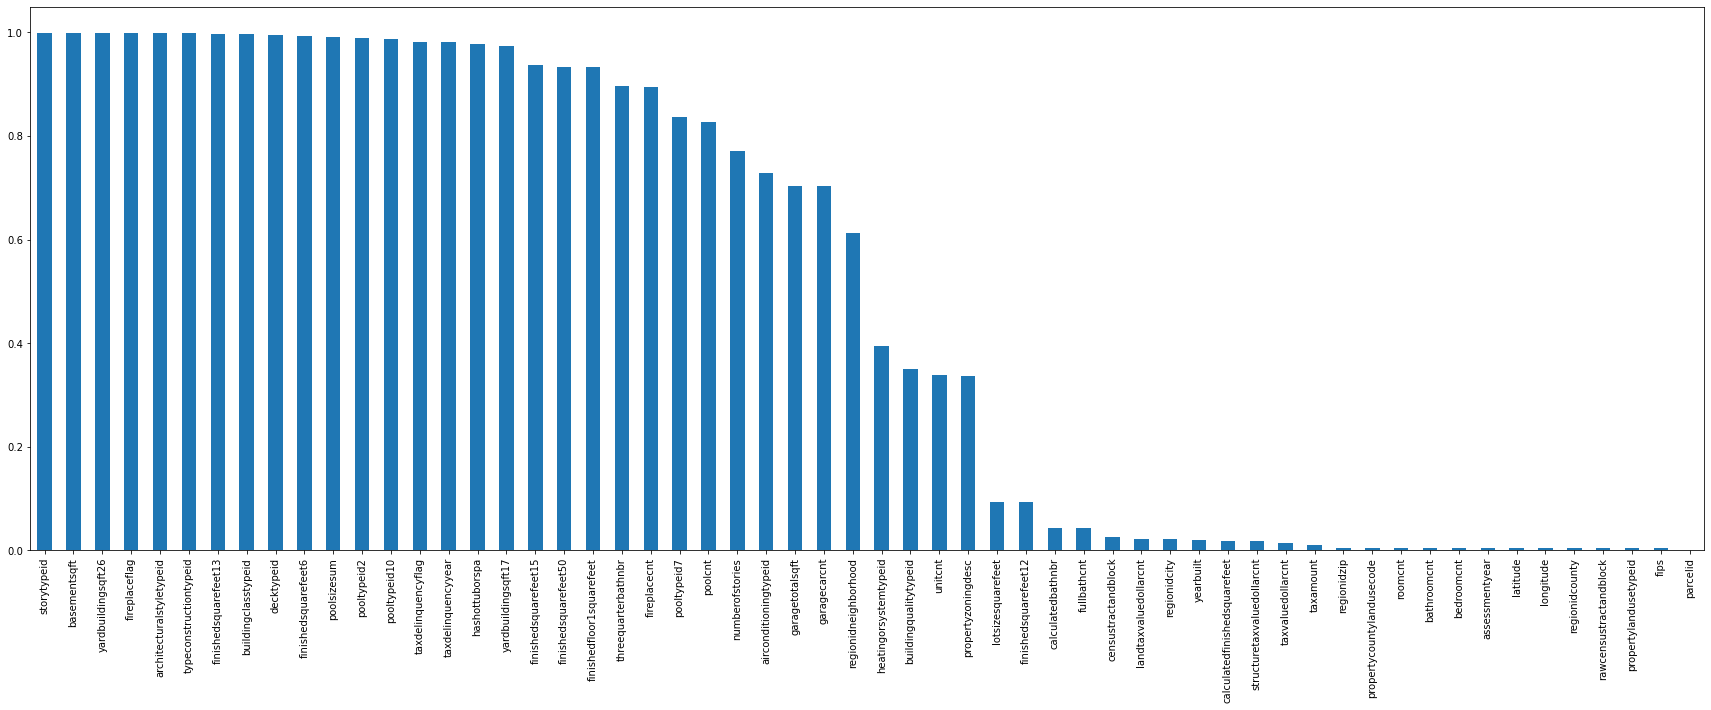

In [15]:
# we have about 24 okay features, then coverage really starts to tank
coverage_stats.sort_values(ascending=False).plot.bar(figsize=(30,10))

# Join training data to features

In [16]:
training_data = pd.merge(train_2016, properties_2016, on=['parcelid'], how='inner')
## 


In [52]:
# import numpy as np
# a1 = pd.Series([1,2,3,4])
# a2 = ['a','b' ,'c','d']
# date1 = ['2021/01/13','2021/01/12','2021/01/11','2021/01/10']
# df1 = pd.DataFrame({'a':a1, 'b' :a2 , 'date' : date1} , index = 'date', parsedate = True)
# df2 = pd.DataFrame({'c':a1,'d' : ['r','rr','rrr','rrrr']})
# merge = pd.merge(df1,df2, left_on=['a'], right_on = ['c'],how = 'inner')
# merge.cov( )

In [28]:
coverage_stats = (training_data.isnull().sum() / training_data.shape[0])
training_data.sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

<AxesSubplot:>

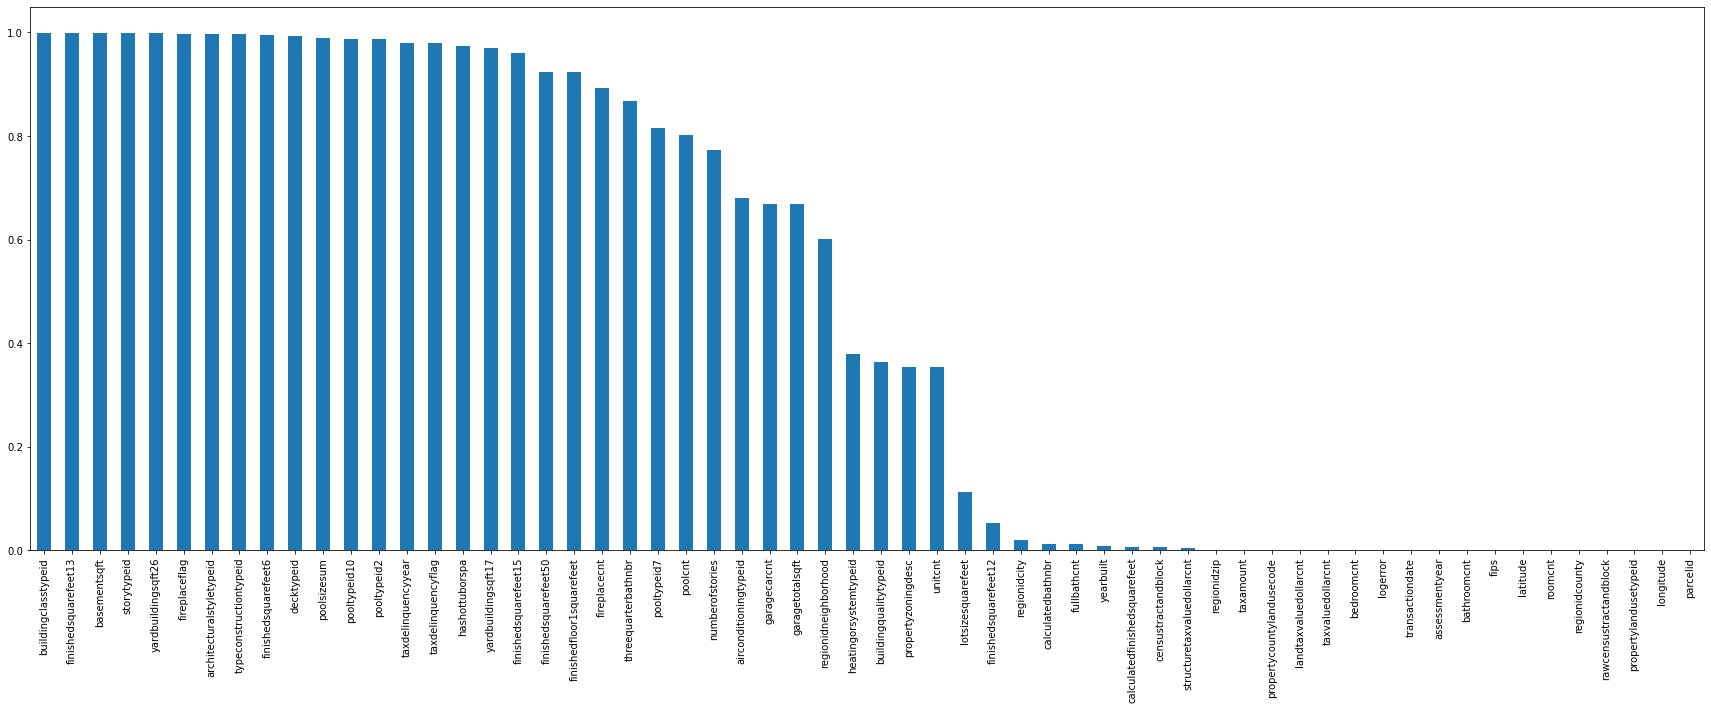

In [29]:
coverage_stats.sort_values(ascending=False).plot.bar(figsize=(30,10))

In [30]:
# let's check where these homes actually are
map_data = training_data.assign(latitude=training_data.latitude/1e6, longitude=training_data.longitude/1e6)[['parcelid', 'latitude', 'longitude']].sample(10000)

properties_map = KeplerGl(
    data={
        'properties': map_data
    },
    config={
        'version': 'v1',
        'config': {
            'mapState': {
                'latitude': map_data.latitude.mean(),
                'longitude': map_data.longitude.mean()
            }
        }
    }
)
b64d_html = base64.b64encode(str(properties_map._repr_html_(),'utf-8').encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
IPython.display.HTML(framed_html)



NameError: name 'KeplerGl' is not defined